**Importing Libraries**

In [ ]:
#Importing all the libraries required for the report
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
import warnings as warnings
warnings.filterwarnings('ignore')

**Reading the dataset (CSV file)**

In [ ]:
#Giving colab access to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/diabetes2.csv") # Reading the CSV file and storing the data 

**Printing CSV file**

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data information**

In [ ]:
data.shape
#We have 768 rows and 8 columns

(768, 9)

In [ ]:
data.columns
#Variable names in dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.info
#Information about columns

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
#Renaming the columns
df = data.rename(columns={'Outcome': 'Diabetes'})

In [143]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Diabetes                      int64
BMIClass                     object
AgeClass                     object
dtype: object

In [ ]:
df.describe()
#Describing the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head(5)
#First 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail(5)
#Last 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.duplicated().sum()
#Checking number of duplicated values
#No duplicated values

0

In [ ]:
df.nunique()
#Number of unique values

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Diabetes                      2
dtype: int64

**Checking for Null Values**

In [ ]:
df.isnull().sum()
#Number of missing values for each column
#No null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

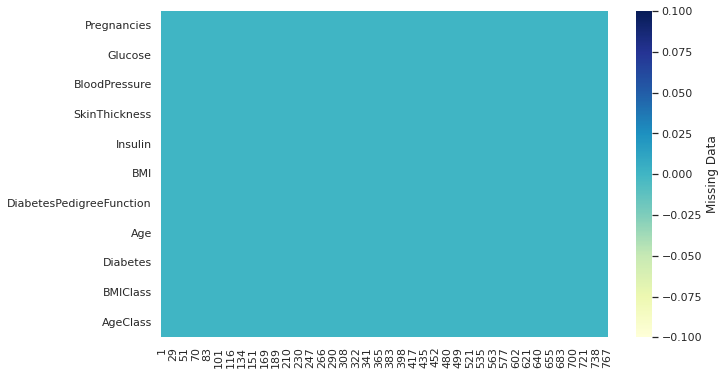

In [147]:
#A heatmap is used to visualize the missing values in the dataset.
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 720x432 with 0 Axes>

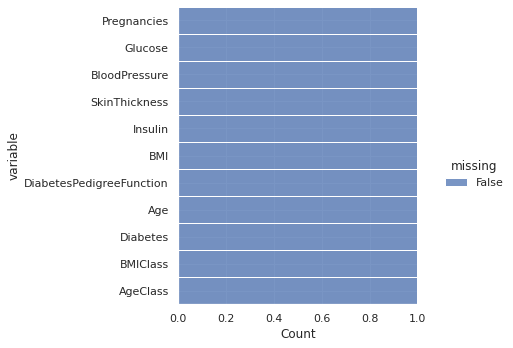

In [148]:
#A bar chart created to visualize the missing values in the dataset.
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [ ]:
(df[df.columns] == 0).sum()
#Checking 0 values in the dataset

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetes                    500
dtype: int64

In [149]:
for i in ["Glucose","BMI","Insulin","BloodPressure","SkinThickness"]:
    df[i].replace({0:df[i].median()},inplace = True)
  #Replacing 0 values with the median

In [150]:
(df[df.columns] == 0).sum()
#Checking for 0 values again

Pregnancies                  81
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Diabetes                    357
BMIClass                      0
AgeClass                      0
dtype: int64

**Outlier Observation**

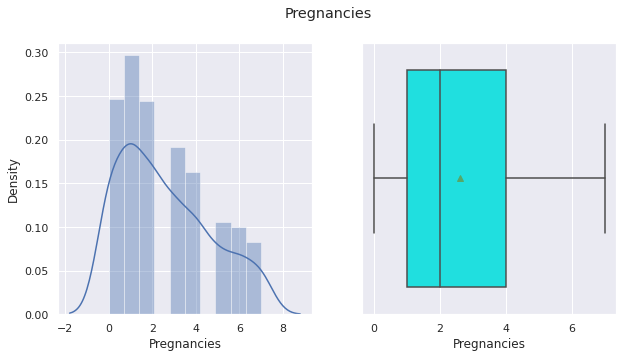

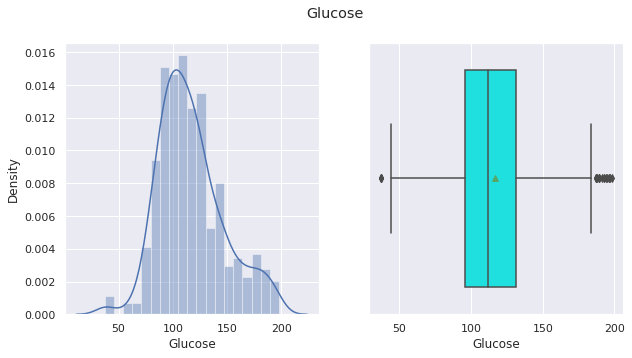

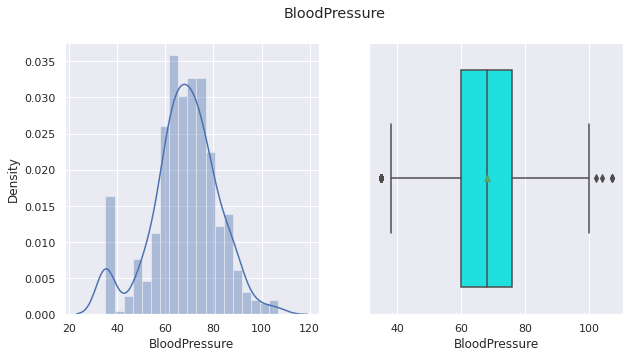

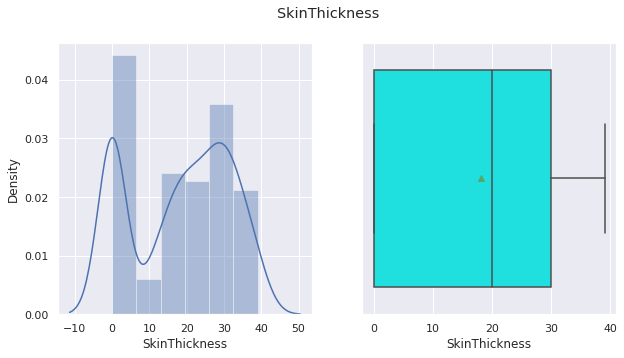

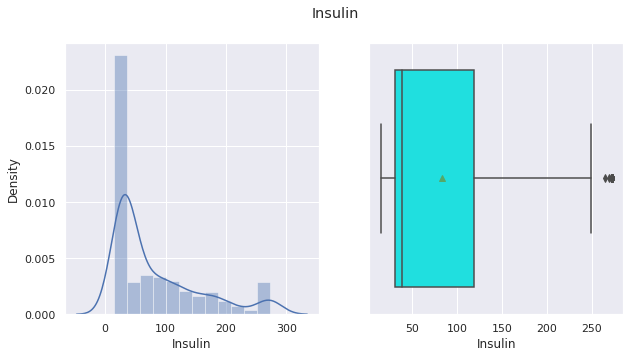

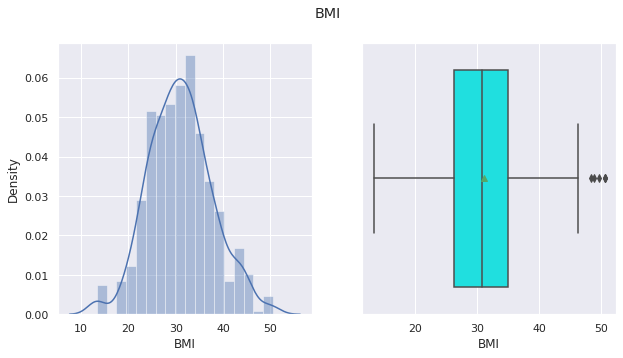

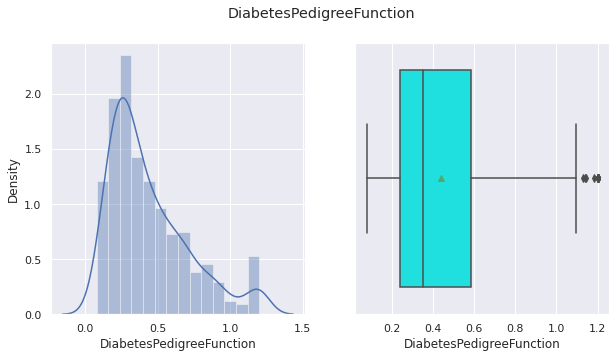

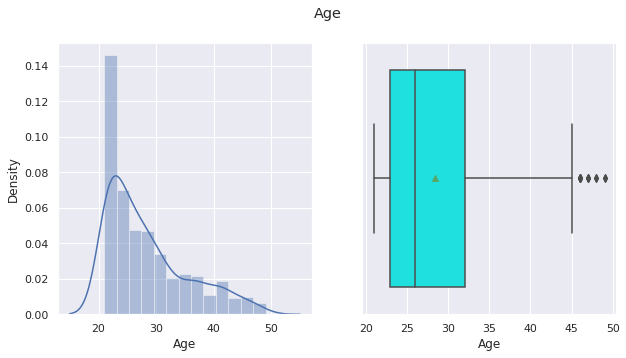

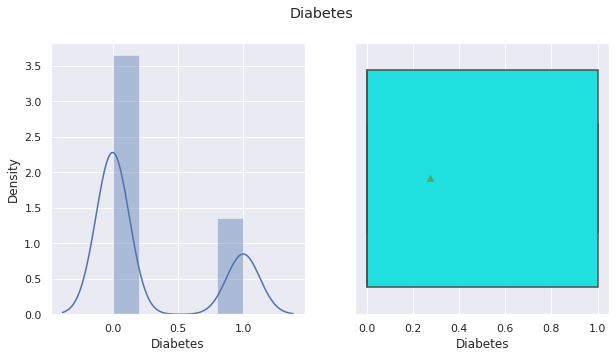

In [ ]:
#Bifurcating columns into columns with character or numeric values
obj_col=df.select_dtypes(include=["object"]).columns.to_list()
num_col=df.select_dtypes(exclude=["object"]).columns.to_list()


#Box plot and Distribution plot
col=num_col

for x in col:
    fig, axes=plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[x], ax=axes[0], kde=True)
    sns.boxplot(df[x], ax=axes[1], showmeans=True,color='cyan')
    fig.suptitle(x)

In [ ]:
#Skewness from all the variables 
print(df["Pregnancies"].skew())
print(df["Glucose"].skew())
print(df["BloodPressure"].skew())
print(df["SkinThickness"].skew())
print(df["Insulin"].skew())
print(df["BMI"].skew())
print(df["Age"].skew())  
        

0.6156396496213958
0.3221788274295189
-0.5451701511979015
-0.22870793055250085
1.3933281074585542
0.15944615792022407
1.040155129127571


In [ ]:
print(df.quantile(0.90))
#Getting the 90th percentile for all variables 

Pregnancies                   6.000
Glucose                     147.200
BloodPressure                84.000
SkinThickness                34.000
Insulin                     183.400
BMI                          39.160
DiabetesPedigreeFunction      0.829
Age                          37.000
Diabetes                      1.000
Name: 0.9, dtype: float64


In [ ]:
#Dropping skewed values from Glucose
index = df[(df['Glucose'] >=180)].index
df.drop(index, inplace=True)
df["Glucose"].describe()
print(df["Glucose"].skew())

0.3002042230136557


In [ ]:
#Dropping skewed values from Age
index = df[(df['Age'] >=45)].index
df.drop(index, inplace=True)
df["Age"].describe()
print(df["Age"].skew())

1.040155129127571


In [ ]:
#Dropping skewed values from BloodPressure
index = df[(df['BloodPressure'] >=100)].index
df.drop(index, inplace=True)
df["BloodPressure"].describe()
print(df["BloodPressure"].skew())

-0.5451701511979015


In [ ]:
print(df["BMI"].skew())
#Skewness of BMI after dropping outliers for other variables

0.15944615792022407


In [ ]:
bina=pd.get_dummies(df['Diabetes'])
bina


,0,1
1,1,0
3,1,0
4,0,1
5,1,0
6,0,1
...,...,...
760,1,0
764,1,0
765,1,0
766,0,1


**Data Visualization**

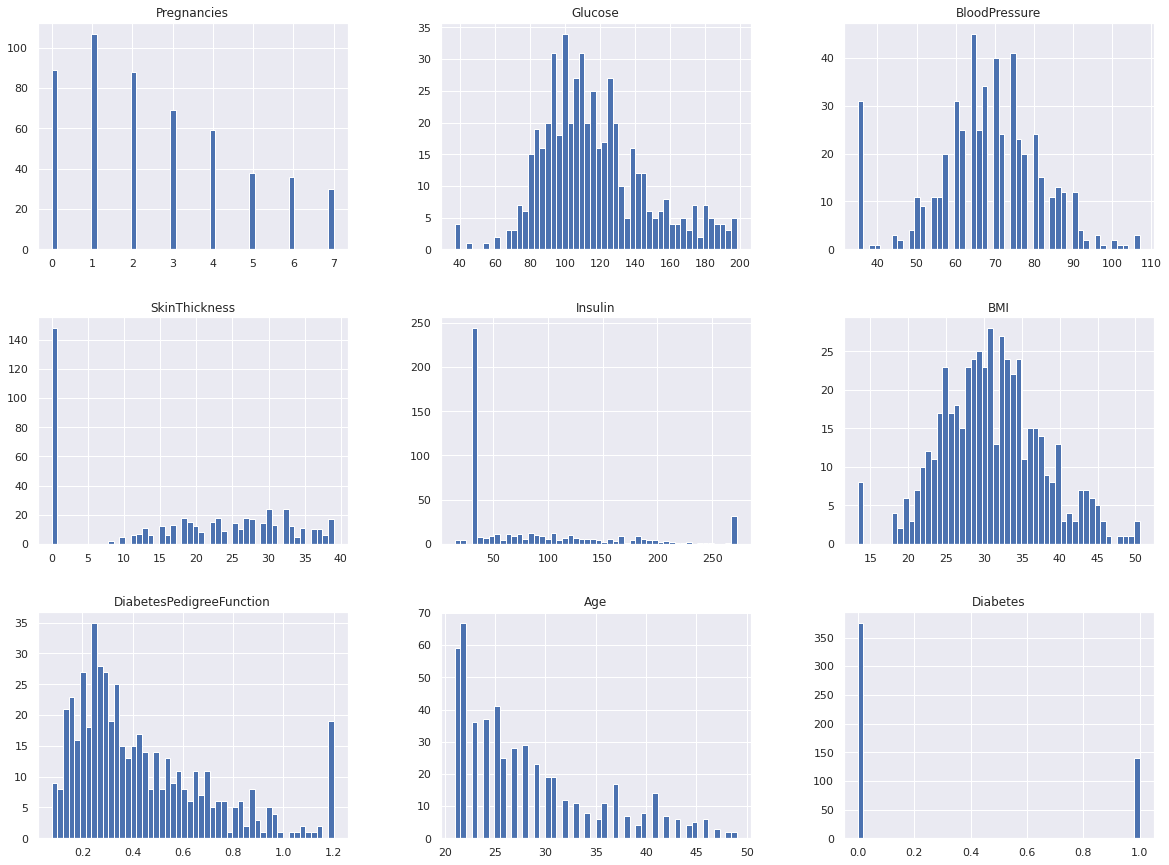

In [ ]:
#Data distribution of all variables
df.hist(bins=50, figsize=(20,15));


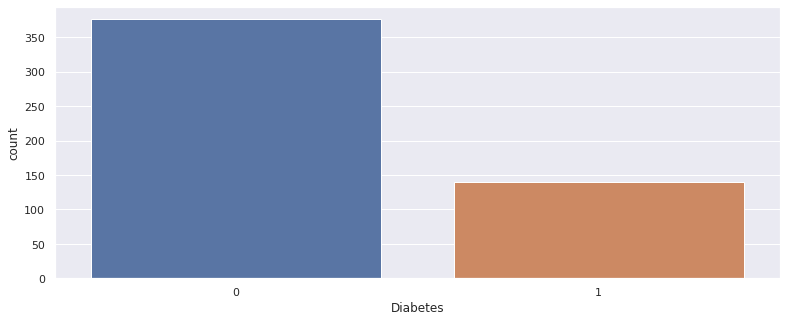

In [ ]:
#Diabetes variable distribution
sns.countplot(x ='Diabetes', data = df);


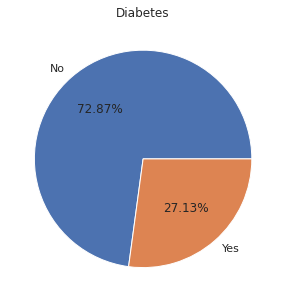

In [ ]:
#Pie chart distribution of the diabetes variable
plt.title('Diabetes')
plt.pie(df['Diabetes'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

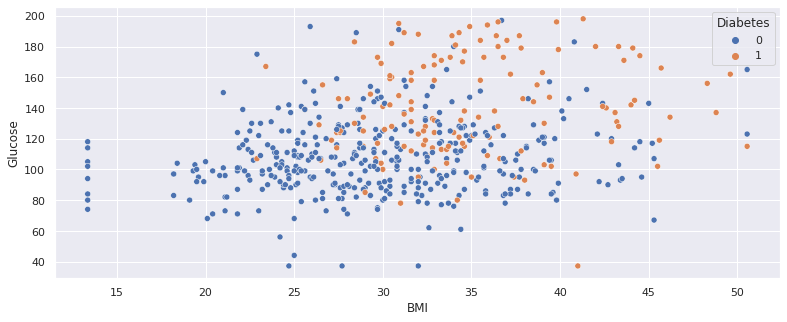

In [ ]:
#Scatter plot showing the correlation between the variable BMI & Glucose level while identifiying whether or not the individual has diabetes 
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Diabetes")

In [ ]:
#Correlation table between all the numeric variables
print(df.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.097912       0.084651      -0.104004   
Glucose                      0.097912  1.000000       0.142451       0.029350   
BloodPressure                0.084651  0.142451       1.000000       0.123410   
SkinThickness               -0.104004  0.029350       0.123410       1.000000   
Insulin                     -0.057821  0.364952       0.039324       0.461539   
BMI                          0.021015  0.286119       0.280781       0.245777   
DiabetesPedigreeFunction    -0.064972  0.088720       0.005636       0.138093   
Age                          0.490651  0.222527       0.238599      -0.103181   
Diabetes                     0.147977  0.483313       0.048756      -0.002293   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.057821  0.021015                 -0.064972   
Glucose                   0.364952  0.286

Text(0.5, 1.0, 'Correlation matrix of variables')

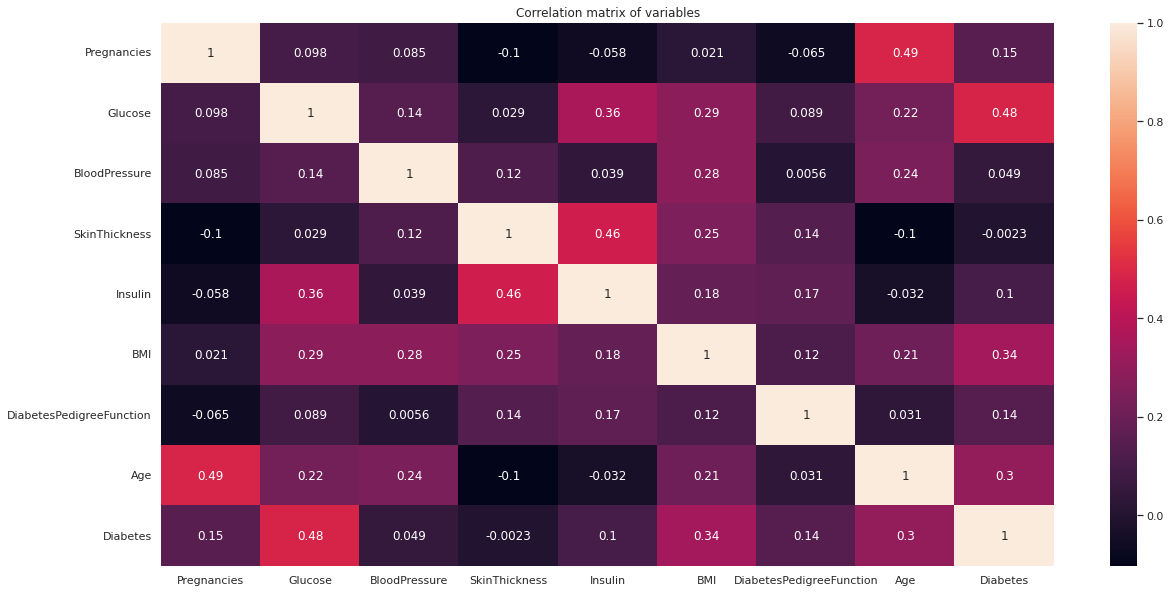

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix of variables")
#Heatmap of the correlation between the variables

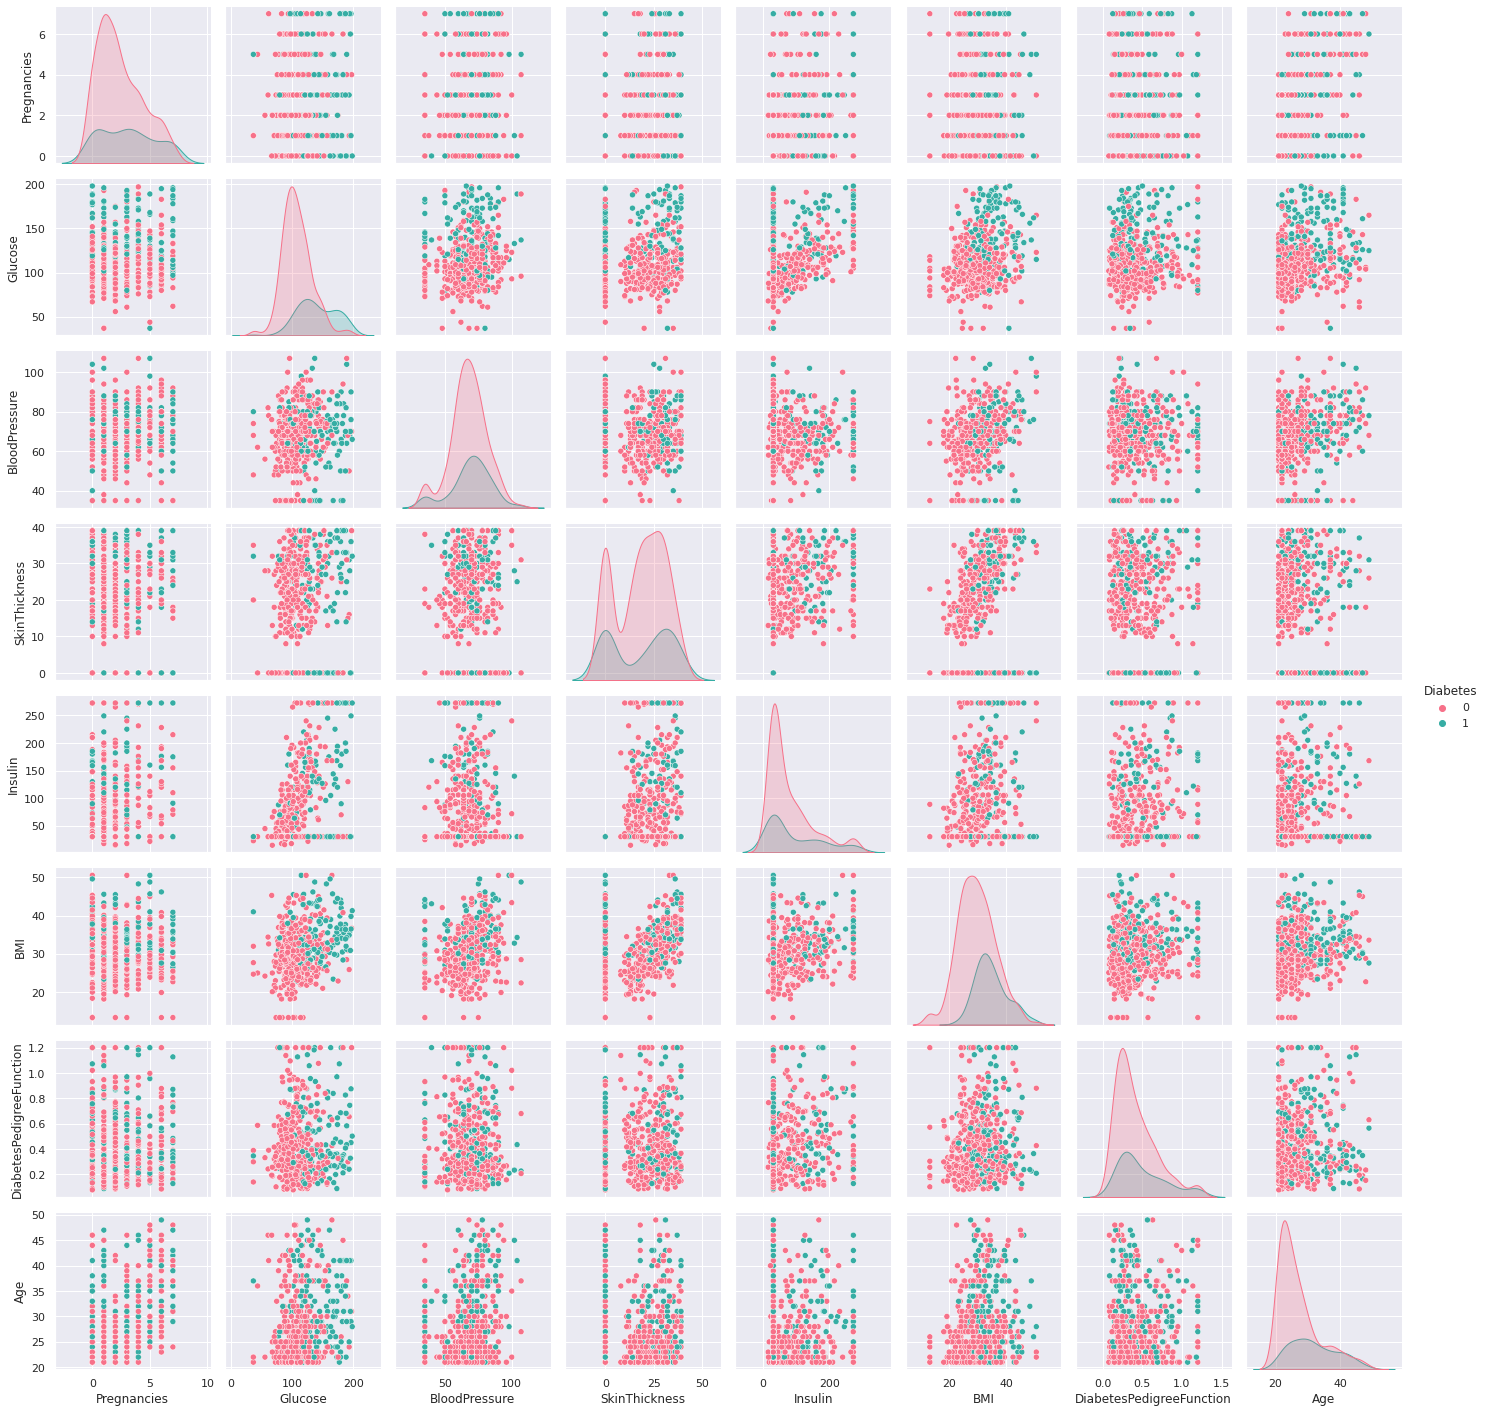

In [ ]:
#Pairplot used to determine the correlation between two variables
sns.pairplot(df, hue='Diabetes', palette="husl")

In [ ]:
#Creating new variable called BMIClass using else functions
df['BMIClass'] = df["BMI"].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if x<24.9 else ('Overweight' if x<29.9 else 'Obese')))
print(df['BMIClass'])

1      Overweight
3      Overweight
4           Obese
5      Overweight
6           Obese
          ...    
758         Obese
760    Overweight
764         Obese
765    Overweight
767         Obese
Name: BMIClass, Length: 469, dtype: object


Text(0.5, 1.0, 'BMIClass Vs Diabetes')

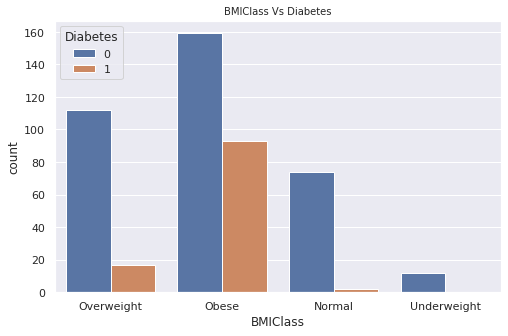

In [ ]:
#Comparing BMIClass with the number of individuals that have diabetes
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(df["BMIClass"],hue=Diabetes)
plt.show
plt.title("BMIClass Vs Diabetes",fontsize=10)

In [ ]:
#Creating new variable called BMIClass using else functions
df['AgeClass'] = df["Age"].apply(lambda x: 'Child & Teen' if x < 18 else ('Young Adult' if x<25 else ('Adult' if x<40 else 'Elderly')))
print(df['AgeClass'])

1            Adult
3      Young Adult
4            Adult
5            Adult
6            Adult
          ...     
760    Young Adult
764          Adult
765          Adult
766        Elderly
767    Young Adult
Name: AgeClass, Length: 516, dtype: object


Text(0.5, 1.0, 'AgeClass Vs Diabetes')

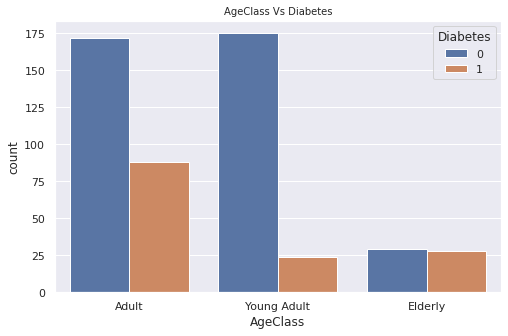

In [ ]:
#Comparing BMIClass with the number of individuals that have diabetes
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(df["AgeClass"],hue=Diabetes)
plt.show
plt.title("AgeClass Vs Diabetes",fontsize=10)